## L3 Mathématiques - 2023/24 - Univ. Paris-Saclay
## Analyse théorique et numérique des EDO - Année 2023/24
---------------------------------------------------------------------------------------------------------------

## TP 1 : Représentation des solutions d'une EDO et résolution approchée par le schéma d'Euler explicite
---------------------------------------------------------------------------------------------------------------

### Partie 1. Champs de vecteurs pour une EDO scalaire.

Soit $f:\mathbb{R}\times\mathbb{R}\longrightarrow\mathbb{R}$ une fonction de classe $C^1$ et considérons l'équation différentielle
$$
(E)\ \ \ \ \ \ \ y'(t)=f(t,y(t)).
$$


Très souvent on ne sait pas résoudre explicitement l'équation différentielle $(E)$. Mais on peut avoir une idée de l’allure du graphe d'une solution de cette équation en observant le *champ de vecteurs*, ou *champ de vitesses*, associé, qui est l'application 
$$
V:(t,y)\mapsto\big(1,f(t,y)\big).
$$
En effet, en un point $(t,y(t))$ du graphe d'une solution $t\mapsto y(t)$ de l'équation $y'=f(t,y)$, le vecteur vitesse $(1,y'(t))$, qui est égal au vecteur $(1,f(t,y(t)))$, est tangent au graphique en ce point. La connaissance de la fonction $f$ en chaque point (t,y) permet donc de représenter ces vecteurs tangents même si l'on ne connait pas la solution de $(E)$. Et si l'on en trace un grand nombre de ces vecteurs, issus de points uniformément répartis dans le plan (t,y), on obtient une représentation du champ de vecteurs associé à l'équation différentielle qui permet souvent de *deviner* les graphes des solutions puisqu'il s'agit de courbes dont les tangentes en leurs points sont des vecteurs de ce champs de vecteurs.

On va dans cette feuille représenter des champs de vecteurs, dans un premier temps pour une EDO dont la solution on sait calculer, et superposer dans le plan $(t,y)$ le graphique de la solution. On fera ensuite pareil pour une EDO dont on ne sait pas calculer la solution analytique, et on utilisera le schéma d'Euler explicite pour obtenir une *solution numérique* approchée. 

*On représente chaque vecteur vitesse $V(P)$ en un point $P=(\bar{t},\bar{y})$ du plan, par une flèche correspondant au segment $[P,P+\varepsilon V(P)],$ avec $\varepsilon$ petit, partant de $P$ et pointant vers $P+\varepsilon V(P)$. En python, on peut utiliser la fonction* `quiver` *du module* `matplotlib` *pour représenter les champs de vecteurs.* 

### Exercice 1. Représentation des solutions d'une EDO et des champs de vecteurs.

Nous nous intéressons aux deux équations suivantes :

\begin{equation}\tag{1}
y'=-ty,
\end{equation}

\begin{equation}\tag{2}
y'=ty^2.
\end{equation}

Les solutions d'un problème de Cauchy, de donnée initiale $y(0)=y_0$, avec $y_0\in\mathbb{R}$ donné, pour chacune des équations (1) et (2) sont respectivement (**exercice : retrouver les expressions de ces solutions**) :

Pour l'équation (1) :
$$
y(t)=y_0 e^{-\frac{t^2}{2}}.
$$

Pour l'équation (2) :
$$
y(t)=\frac{y_0}{{1}-y_0\frac{t^2}{2}}.
$$


**Question 1).** Pour l'équation (1) :
 - Sur python, tracer dans l'intervalle $[-3,3]$, la solution de (1) qui vérifie $y(0)=1.$ Tracer ensuite sur le même graphique la solution qui vérifie la condition initiale $y(0)=2.$ Donner un titre et mettre des légendes sur vos graphiques.

 - Tracer dans le même graphique le champ de vecteurs associé à cette équation, en utilisant les commandes :
 
`t=np.linspace(-5,5,35) # abcisse des points de la grille
 y=np.linspace(0,2.1,23) # ordonnées des points de la grille
 T,Y=np.meshgrid(t,y) # grille de points dans le plan (t,y)
 U=np.ones(T.shape)/np.sqrt(1+f1(T,Y)**2) # matrice avec les composantes horizontales des vecteurs (1),                                                     normalisées
 V=f1(T,Y)/np.sqrt(1+f1(T,Y)**2) # matrice avec les composantes verticales des vecteurs (f(t,y)),                                                  normalisées
 plt.quiver(T,Y,U,V,angles='xy',scale=20,color='blue')`
 
 La figure sera plus lisible si on limite la fenêtre graphique au rectangle $[-5,5]\times[0,2.1]$ avec la commande 
 `plt.axis([-5,5,0,2.1])`

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [178]:
def plot_u(t0,Tmax,y0,u):
    """fontion traçant la courbe d'une fontion u"""
    tt = np.linspace(t0,Tmax,100)     
    y = u(tt,y0)                  
    plt.plot(tt,y,label=f'y(0)={y0}')

def quiver(t0,tmax,y0,ymax,f):
    """fonction traçant le champ de vecteur d'une fontion f """
    t = np.linspace(t0,tmax,40)                                 # abcisse des points de la grille  
    y = np.linspace(y0,ymax,20)                                 # ordonnées des points de la grille  
    T,Y = np.meshgrid(t,y)                                      # grille de points dans le plan (t,y)  
    U = np.ones(T.shape)/np.sqrt(1+f(T,Y)**2)                   # matrice avec les composantes horizontales des vecteurs (1), 
    V = f(T,Y)/np.sqrt(1+f(T,Y)**2)                             # matrice avec les composantes verticales des vecteurs (f(t,y))
    plt.quiver(T,Y,U,V,angles='xy',scale=20,color='grey')
    plt.axis([t0,tmax,y0,ymax])
    plt.legend(loc=1)
    plt.xlabel('t')
    plt.ylabel('f(t)')
    plt.title(f'Solution pour l\'EDO associée à {f.__name__}')

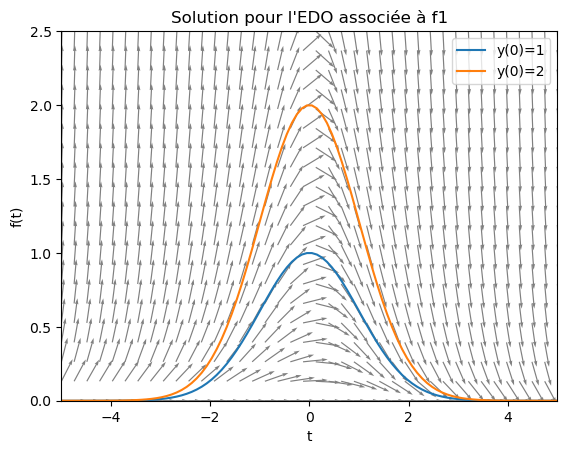

In [179]:
# Fonction f définissant l'EDO 1 
def f1(t,y):
    return -t*y

# Solution exacte 
def uex1(t,y0):
    return y0*np.exp(-(t**2/2))

#Paramètres: 
t0,tmax = -5,5
y0,ymax = 0,2.5

#Tracé des solutions exactes:
plot_u(t0,tmax,1,uex1)       # sol. exacte avec y_0=1
plot_u(t0,tmax,2,uex1)       # sol. exacte avec y_0=2

#Tracé du champ de vecteurs:
quiver(t0,tmax,y0,ymax,f1)

**Question 2.** Refaire le même exercice pour l'équation (2), en adaptant les intervalles de représentation des différentes solutions.

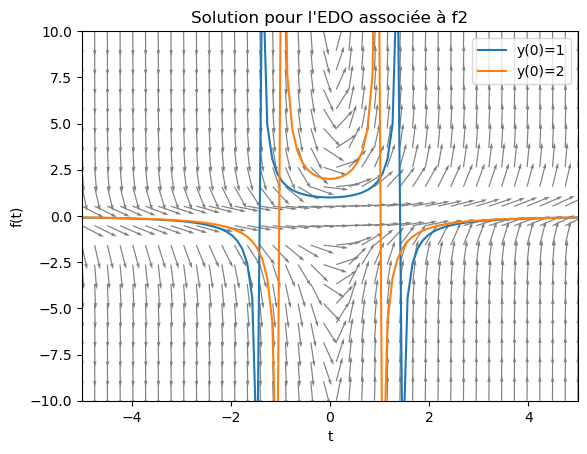

In [180]:
# Fonction f définissant l'EDO 2 
def f2(t,y):
    return t*y**2

# Solution exacte 
def uex2(t,y0):
    return y0/(1 - y0*(t**2 /2))

#Paramètres: 
t0,tmax = -5,5
y0,ymax = -10,10

#Tracé des solutions exactes:
plot_u(t0,Tmax,1,uex2)       # sol. exacte avec y_0=1
plot_u(t0,Tmax,2,uex2)       # sol. exacte avec y_0=2

#Tracé du champ de vecteurs:
quiver(t0,tmax,y0,ymax,f2)

### Partie 2. Calcul d'une solution approchée d'une EDO par le schéma d'Euler explicite.

On considère le problème de Cauchy pour l'équation différentielle $(E),$ 
\begin{equation}
(PC)\ \ \ \ \ \begin{cases}
  y'(t) & =  f(t,y(t)), \\
  y(t_0) & =  y_0,
\end{cases} 
\end{equation}
où l'instant initial $t_0\in\mathbb{R}$ et la valeur initiale $y_0\in\mathbb{R}$ sont donnés. 

On suppose que ce problème a une unique solution $y:J\longrightarrow\mathbb{R}$ définie dans un intervalle $J\subseteq\mathbb{R}.$ On s'intéresse ici à trouver numériquement une solution approchée de $y$, dans un intervalle de la forme $[t_0, t_0+T]\subseteq J$, avec $T>0$. 

Pour ce faire, on se donne $h>0$ *petit* et on considère une subdivision uniforme de pas $h$ de l'intervalle $[t_0, t_0+T]$. On peut procéder comme suit :

 - on se donne $N\in\mathbb{N}$ *grand* 
 
 - on définit $h=\frac{T}{N}$ 
 
 - on définit les **N+1** points $t_n=t_0+n h,\ n=0,\dots,N$ :
$$
t_0,\ \ t_1=t_0+h,\ \ \cdots,\ \ t_N=t_0+Nh=t_0+T. 
$$

On cherche alors des valeurs (réelles) $y^0,\ y^1,\cdots,\ y^N$ qui approchent la solution exacte $t\mapsto y(t)$ de $(PC)$ respectivement aux points $t_0,\ t_1,\cdots,\ t_N.$ On va définir ces valeurs par un *schéma numérique*.

On pose $y^0=y_0$ (*ceci est légitime car on veut que $y^0\approx y(t_0)$ et $t\mapsto y(t)$ vérifie $y(t_0)=y_0$*). 

Soit $n\in\{1,\dots,N\}.$ Pour calculer une valeur $y^n$ approchant $y(t_n)$, la solution exacte à l'instant $t_n$, on peut approcher la dérivée de $y$ par un taux d'accroissement au point $t_n$ et utiliser l'équation $(E).$ La solution exacte de $(E)$ vérifie

$$
y'(t_n)=f(t_n,y(t_n)),
$$

en chaque point $t_n$, et 

$$
y'(t_n)\approx \frac{y(t_n+h)-y(t_n)}{h}=\frac{y(t_{n+1})-y(t_n)}{h}.
$$

On remplace alors l'équation $y'(t)=f(t,y(t))$ par l'équation $\frac{y(t+h)-y(t)}{h}=f(t,y(t)),$
en chaque point $t_n$ de la subdivision considérée, autrement dit on cherche $y^1,\dots,y^N$ solutions de 
$$
\frac{y^{n+1}-y^n}{h}=f(t_n,y^n).
$$

Le schéma d'Euler explicite consiste alors à définir la suite $(y_0,\dots,y^N)_{N}$ des valeurs approchées comme ci-dessous. 

**Schéma d'Euler explicite** :   

$$
\begin{cases}
y^0=y_0,\\
y^{n+1}=y^{n}+h f(t_n,y^{n}),\ \ \ \textrm{pour }\ n\in\{0,\dots,N-1\}.
\end{cases}.
$$  

**Question 1.** Écrire une fonction python de la forme

`euler_exp(t0, T, y0, h, f)`

prenant en argument  l'instant initiale **t0**, la longueur **T** de l'intervalle de temps $[t_0,t_0+T],$ la donnée initiale $y_0$, le pas de temps $h$ et la fonction $f$ définissant le second membre de l'EDO. Cette fonction `euler_exp` devra retourner deux vecteurs : 

- $[t_0,\, t_1,\, ...,\, t_N],$  tableau `numpy` unidimensionnel de taille $(N+1)$ représentant la subdivision de l'intervalle $[t_0,t_0+T]$ de pas $h$ considérée, 

- $[y_0,\, y_1,\, ...,\, y_N],$ tableau `numpy` de taille $(N+1)$ représentant la solution approchée aux instants $t_n,\ n=0,\dots,N.$

**Quelques remarques pour la programmation du schéma d'Euler.** 

- Pour programmer le schéma d'Euler, on peut aussi construire une fonction python de la forme `euler_exp(t0, T, y0, N,f)`, en donnant comme argument le nombre de points $N$ que l'on considère dans la subdivision de l'intervalle $[t_0,t_0+T].$ Dans ce cas, il faudra définir le pas $h$ à l'intérieur de la fonction.

- Veuiller à bien faire attention à la taille des vecteurs que vous définissez, et que cette taille soit cohérente avec le pas $h$ défini : si $h=1/N$, le vecteur $[t_0,\, t_1,\, ...,\, t_N]$ contenant les points $t_n=t_0+nh,\ n=0,\dots,N$, est de taille N+1.

**Question 2.** Calculer la solution approchée obtenue par la méthode d'Euler explicite pour le problème de Cauchy pour l'équation (1) de la partie 1, de donnée initiale $y(0)=1$.
 Tracer sur une même fenêtre graphique :

- La solution exacte sur l'intervalle $[0,1]$ discrétisée avec un pas de temps de $10^{-4}$ ;

- Les 3 solutions approchées sur le même intervalle obtenues avec la méthode d'Euler pour les trois pas de temps $h=1/5,\ h=1/10,\ h=1/50$ (obtenus respectivement avec $N=5,\ 10,\ 100$).

Rajouter des légendes à votre graphique.

In [196]:
# Euler explicite
def euler_exp(t0,T,y0,h,f):
    """"Schémas d'Eurler explcite"""
    N = int(T/h)
    tt = np.linspace(t0,t0+T,N)
    y = np.zeros_like(tt)
    y[0] = y0
    for n in range(N-1):
        y[n+1] = y[n] + h*f(tt[n],y[n])
    return tt,y

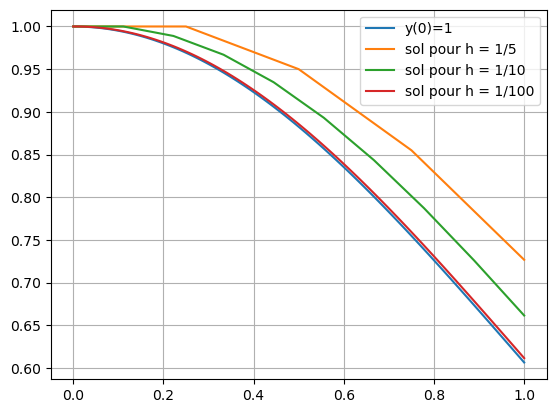

In [194]:
#Paramètres: 
t0,tmax = 0,1
y0=1
h = 1e-3

#Tracé des solutions exactes:
plot_u(t0,tmax,y0,uex1)

#Tracé des solutions approchée:
for N in [5,10,100]:
    tt,y = euler_exp(t0,tmax,y0,T/N,f1)
    plt.plot(tt,y,label=f"sol pour h = {T}/{N}")

plt.legend()
plt.grid()

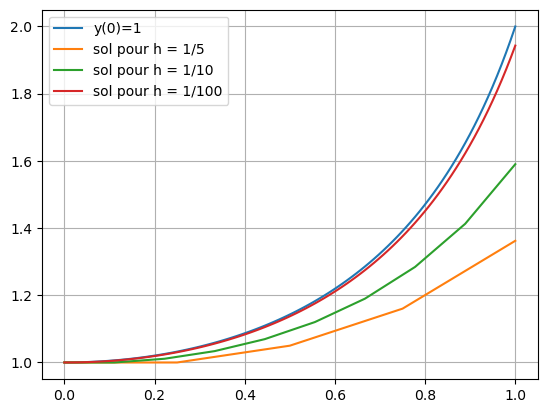

In [193]:
#Paramètres: 
t0,tmax=0,1
y0=1
h = 1e-3

#Tracé des solutions exactes:
plot_u(t0,tmax,y0,uex2)

#Tracé des solutions approchée:
for N in [5,10,100]:
    tt,yeuler2 = euler_exp(t0,tmax,y0,T/N,f2)
    plt.plot(tt,yeuler2,label=f"sol pour h = {T}/{N}")

plt.legend()
plt.grid()

### Partie 3. Modèles de croissance d'une population.

#### Modèle de Verhulst.

Considérons une population d'individus isolée dont on note $P(t)$ sa taille à l'instant $t.$ 

Le modèle le plus simple pour décrire l'évolution de cette population est le modèle de Malthus, donné par l'équation différentielle
\begin{equation*}
P'(t)=(n-d)P(t),
\end{equation*}
où $n$ et $d$ sont des constantes positives qui représentent respectivement les taux de naissances et de décès de la population.

Ce modèle prévoit que si $n>d$, la population grandit exponentiellement, si $d>n$, la population décroît et tend vers l'extinction.

Un deuxième modèle suppose que la croissance de la population est inhibée par la limitation des ressources et que la population ne dépasse pas une taille critique donnée par une constante $K>0.$ Si on note $P_0\ge0$ la population à l'instant initiale, l'évolution de la population est modélisée par les équations 

\begin{equation}
\begin{cases}
P'(t)=(n-d)P(t)\big(1-\frac{P(t)}{K}\big),\\
P(0)=P_0.
\end{cases}
\tag{V}
\end{equation}

#### Questions théoriques à réfléchir à la maison.

Pour le modèle de Verhulst, le théorème de Cauchy-Lipschitz garantit l'existence d'une solution maximale, définie dans un intervalle $J$ tel que $0\in J$.

**Question 1.** Quelle est la solution maximale de $(V)$ lorsque  $P_0=0$ et lorsque $P_0=K$ ?

**Question 2.** Montrer que si $n-d>0$, quelque soit $P_0>0$, la solution maximale de $(V)$ est globale à droite et tend vers $K$, lorsque $t\to+\infty$.

**Question 3. à faire sur python.**

On considère dans cette question $n=1,\ d=0.75$ et $K=200.$ Utiliser le schéma d'Euler explicite pour obtenir une solution approchée du problème $(V)$, de donnée initiale $P_0=10,$ dans l'intervalle de temps $[0,50],$ avec un pas $h=0.5.$ Représenter graphiquement la solution obtenue. 

Illustrer, dans le même graphique, l'évolution de la population lorsque la donnée initiale est telle que $P_0>K.$ Interpréter le résultat obtenu.


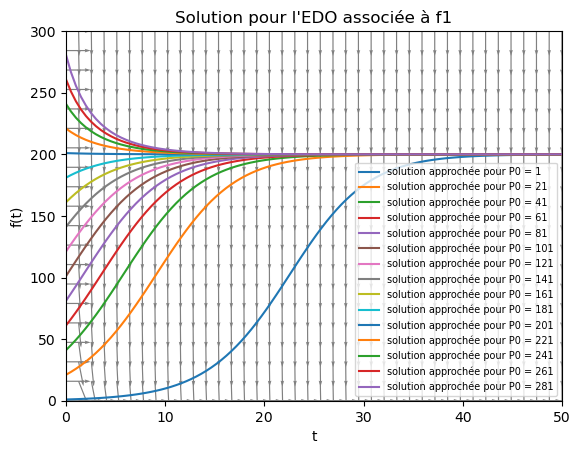

In [195]:
# Fonction f définissant l'EDO V
def fV(t,P):
    return (n-d)*P*(1-P/K)

#Paramètres: 
t0,tmax = 0,50
y0,ymax = 0,300
P0 = 10
h = 0.5
n,d,K=1,0.75,200

#Tracé des solutions approchée:
for P in range(1,K+100,20):
    tt,y = euler_exp(t0,tmax,P,h,fV)
    plt.plot(tt,y, label= f'solution approchée pour P0 = {P}')
    
#Tracé du champ de vecteurs:
quiver(t0,tmax,y0,ymax,f1)
plt.legend(fontsize=7)


#### Un modèle d'évolution d'une population de saumons.

Le modèle suivant décrit l'évolution du nombre d'individus d'une population de saumons :

\begin{equation}
\begin{cases}
P'(t)=(2-\cos(t))P(t)-\frac 12 P^2(t)-1,\\
P(0)=P_0,
\end{cases}
\tag{S}
\end{equation}

où $P_0$ est la population à l'instant initial. Le terme positif périodique $2-\cos(t)$ correspond à un taux de naissances saisonnier. Le modèle suppose que les décès sont proportionnels au carré du nombre d'individus dans la population et le terme indépendante avec signe négatif $-1$ modélise une proportion d'individus péchés.

**Question 4.**

Utiliser le schéma d'Euler explicite pour obtenir une solution approchée du problème $S$, de donnée initiale $P_0=5,$ dans l'intervalle de temps $[0,10],$ avec un pas $h=0.1.$ Représenter graphiquement la solution obtenue. 

Représenter dans le même graphique le champ de vecteurs associé au modèle $(S)$.

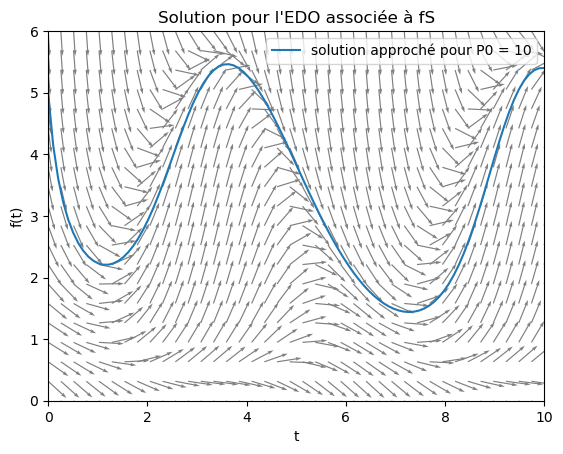

In [186]:
# Fonction f définissant l'EDO S
def fS(t,P):
    return (2-np.cos(t))*P-(P**2)/2-1

#Paramètres: 
P0=5
t0,tmax=0,10
h=0.1
y0,ymax = 0,6

#Tracé des solutions approchée:
tt,y = euler_exp(t0,tmax,P0,h,fS)
plt.plot(tt,y, label="solution approché pour P0 = 10")

#Tracé du champ de vecteurs:
quiver(t0,tmax,y0,ymax,fS)